In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

## LOAD DATA

In [2]:
continent_season = pd.read_csv("data/continent_season.csv", encoding="latin1")
continent_season

,Country,Species,Continent,Hemisphere,Month,Year,Season
0,Australia,2 m shark,Oceania,South,6,2018,Winter
1,Mexico,"Tiger shark, 3m",North America,North,6,2018,Summer
2,Australia,NaN,Oceania,South,6,2018,Winter
3,Brazil,Tiger shark,South America,South,6,2018,Winter
4,Australia,Grey reef shark,Oceania,South,5,2018,Autumn
...,...,...,...,...,...,...,...
2604,Australia,NaN,Oceania,South,1,1807,Summer
2605,Australia,NaN,Oceania,South,5,1788,Autumn
2606,Jamaica,NaN,North America,North,12,1784,Winter
2607,Martinique,NaN,North America,North,3,1783,Spring


In [3]:
pd.isnull(continent_season).sum()

Country          0
Species       1055
Continent        0
Hemisphere       0
Month            0
Year             0
Season           0
dtype: int64

In [4]:
type_shark = pd.read_csv("data/continent_season_type-shark.csv", encoding="latin1")

In [5]:
pd.isnull(type_shark).sum()

Country       0
Continent     0
Month         0
Year          0
Season        0
Type Shark    0
dtype: int64

## DISPLAYING SETTINGS

In [6]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [7]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## HYPOTHESIS

In [8]:
continent_season.groupby("Continent").agg("count")

,Country,Species,Hemisphere,Month,Year,Season
Continent,,,,,,
Africa,592,412,592,592,592,592
Asia,167,44,167,167,167,167
Europe,107,82,107,107,107,107
North America,251,133,251,251,251,251
Oceania,1371,836,1371,1371,1371,1371
South America,121,47,121,121,121,121


### Hipothesis 1: Do more shark attacks occur according to the hemisphere?

In [9]:
df_1 = continent_season[["Continent", "Hemisphere"]].groupby(["Hemisphere", "Continent"])[["Continent"]].agg("count")
df_1

Continent
Hemisphere Continent               
North      Asia                 167
           Europe               107
           North America        251
South      Africa               592
           Oceania             1371
           South America        121

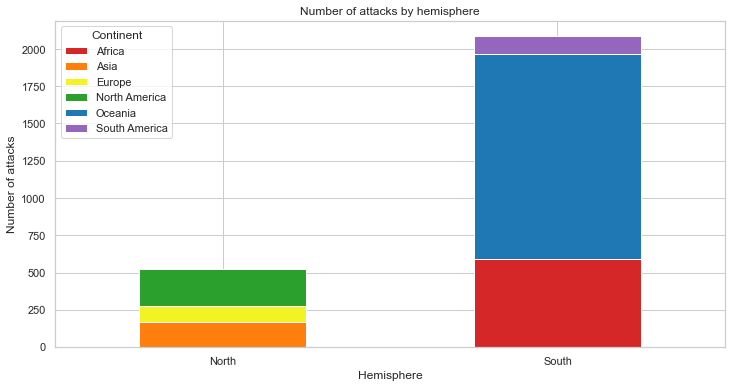

In [10]:
colors = {'Africa': '#d62728', 'Asia': '#ff7f0e', 'Europe': '#f2f324', 'North America': '#2ca02c', 'South America': '#9467bd', 'Oceania': '#1f77b4'}

# Group the data by hemisphere and continent, and count the number of occurrences
df_1 = continent_season.groupby(['Hemisphere', 'Continent']).size().unstack()

# Plot the data with stacked bar chart and color by continent
hip_1 = df_1.plot(kind='bar', stacked=True, title="Number of attacks by hemisphere", color=colors)

# Set the x and y axis labels and rotation
plt.xticks(rotation=0.5)
plt.yticks(rotation=0.5)
plt.ylabel("Number of attacks");

plt.show()

hip_1.figure.savefig('src/attacks_by_hemisphere.png', dpi=600)

### Hipothesis 2: Do more shark attacks occur according to the continent?

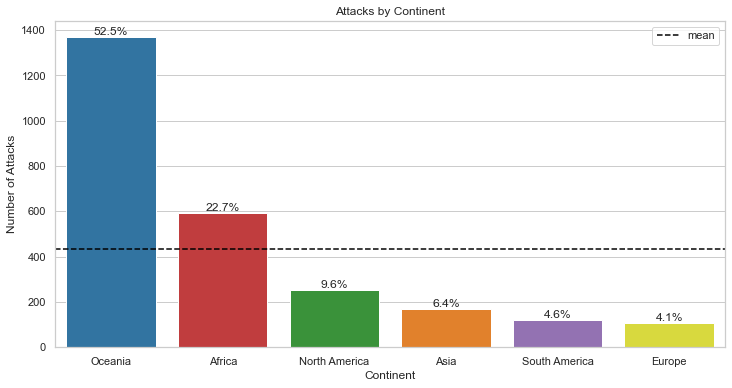

In [11]:
# COUNTPLOT
hip_2 = sns.countplot(x=continent_season["Continent"],
                      palette = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e", "#9467bd", "#f2f324"], 
                      order = continent_season["Continent"].value_counts().index);

#TITLES
hip_2.set_xlabel("Continent")
hip_2.set_ylabel("Number of Attacks")
hip_2.set_title("Attacks by Continent")

#MEDIAN
    # Calculate the median of the values of continents
median_continents = continent_season["Continent"].value_counts().mean()
    # Add an horizontal bar for the median
hip_2.axhline(y=median_continents, color="black",label="mean", linestyle="dashed")

#PERCENTAGE
    # Display the % that represents each Continent
total = float(len(continent_season))
for bar in hip_2.patches:
    # Obtain the height of the bar
    height = bar.get_height()
    # Calculate the percentage corresponding to the bar height
    percent = '{:.1%}'.format(height/total)
    # Calculate the position of the center of the bar
    x = bar.get_x() + bar.get_width() / 2
    y = height + 10
    
    hip_2.annotate(percent, (x, y), ha='center')
    
plt.legend()

plt.show()

hip_2.figure.savefig('src/attacks_by_continent.png', dpi=600)

### Hipothesis 2: Do more shark attacks occur according to the season?

<div style="background-color: yellow;">
.
</div>

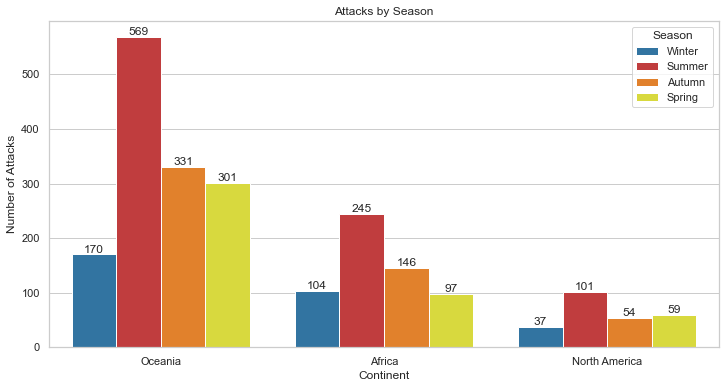

In [12]:
# SORT continents
continent_order = ['Oceania', 'Africa', 'North America']
df_filter_1 = continent_season.loc[continent_season['Continent'].isin(continent_order)]

# COUNTPLOT
hip_3 = sns.countplot(x=continent_season["Continent"], 
                      hue=continent_season["Season"],
                      data=df_filter_1, 
                      palette = ["#1f77b4", "#d62728", "#ff7f0e", "#f2f324"], 
                      order=continent_order);

#TITLES
hip_3.set_xlabel("Continent")
hip_3.set_ylabel("Number of Attacks")
hip_3.set_title("Attacks by Season")

# Add the number of attacks on top of each bar
for bar in hip_3.patches:
    height = bar.get_height()
    hip_3.annotate('{:.0f}'.format(height), xy=(bar.get_x()+bar.get_width()/2., height), 
                   xytext=(0, 5), textcoords='offset points', ha='center', va='center')

plt.show()
hip_3.figure.savefig('src/attacks_by_season.png', dpi=600)

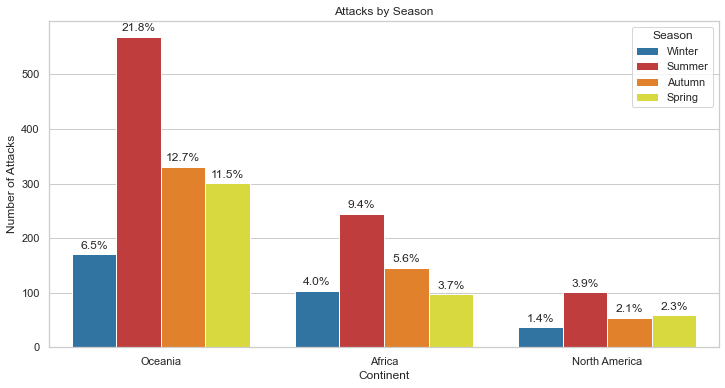

In [13]:
# SORT continents
continent_order = ['Oceania', 'Africa', 'North America']
df_filter_1 = continent_season.loc[continent_season['Continent'].isin(continent_order)]

# COUNTPLOT
hip_4 = sns.countplot(x=continent_season["Continent"], 
                      hue=continent_season["Season"],
                      data=df_filter_1, 
                      palette = ["#1f77b4", "#d62728", "#ff7f0e", "#f2f324"], 
                      order=continent_order);

#TITLES
hip_4.set_xlabel("Continent")
hip_4.set_ylabel("Number of Attacks")
hip_4.set_title("Attacks by Season")


#PERCENTAGE
total = float(len(continent_season))
for bar in hip_4.patches:
    # Obtain the height of the bar
    height = bar.get_height()
    # Calculate the percentage corresponding to the bar height
    percent = '{:.1%}'.format(height/total)
    # Calculate the position of the center of the bar
    x = bar.get_x() + bar.get_width() / 2
    y = height + 10
    
    hip_4.annotate(percent, (x, y), ha='center')

plt.show()

hip_4.figure.savefig('src/attacks_by_season_perc.png', dpi=600)

In [14]:
pd.DataFrame(continent_season.groupby(["Hemisphere","Continent", "Season"])["Season"].count())

Season
Hemisphere Continent     Season        
North      Asia          Autumn      33
                         Spring      41
                         Summer      69
                         Winter      24
           Europe        Autumn      23
                         Spring      10
                         Summer      67
                         Winter       7
           North America Autumn      54
                         Spring      59
                         Summer     101
                         Winter      37
South      Africa        Autumn     146
                         Spring      97
                         Summer     245
                         Winter     104
           Oceania       Autumn     331
                         Spring     301
                         Summer     569
                         Winter     170
           South America Autumn      35
                         Spring      24
                         Summer      33
                         Winter      29

In [15]:
pd.DataFrame(continent_season.groupby(["Season", "Continent"])["Continent"].count())

Continent
Season Continent               
Autumn Africa               146
       Asia                  33
       Europe                23
       North America         54
       Oceania              331
       South America         35
Spring Africa                97
       Asia                  41
       Europe                10
       North America         59
       Oceania              301
       South America         24
Summer Africa               245
       Asia                  69
       Europe                67
       North America        101
       Oceania              569
       South America         33
Winter Africa               104
       Asia                  24
       Europe                 7
       North America         37
       Oceania              170
       South America         29

## Hipothesis 2: 
### Are sharks more aggressive according to the season of the year?

In [16]:
type_shark.groupby("Type Shark").agg("count")

,Country,Continent,Month,Year,Season
Type Shark,,,,,
Blacktip,21,21,21,21,21
Bull,65,65,65,65,65
Mako,26,26,26,26,26
Tiger,107,107,107,107,107
White Shark,373,373,373,373,373


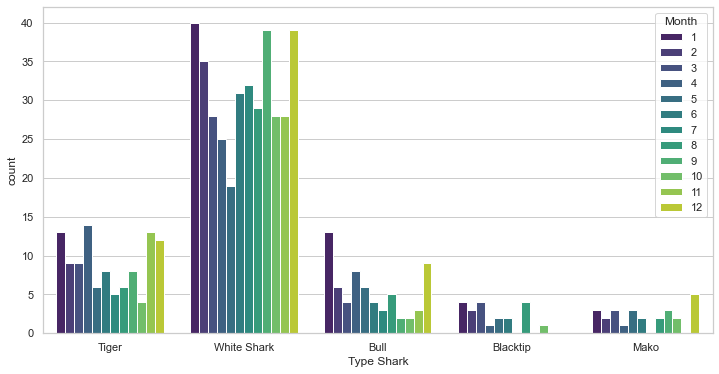

In [17]:
 sns.countplot(x=type_shark["Type Shark"], hue=type_shark["Month"], palette="viridis");

## Hipothesis 3: 
### Which sharks attack the most by continent and by season?

<div style="background-color: yellow;">
.
</div>

## DRAFT

In [18]:
condition_2 = continent_season.Year > 2017

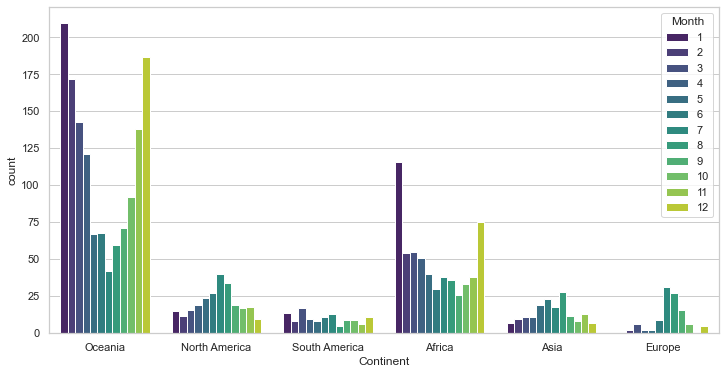

In [19]:
sns.countplot(x=continent_season["Continent"], hue=continent_season["Month"], palette="viridis");

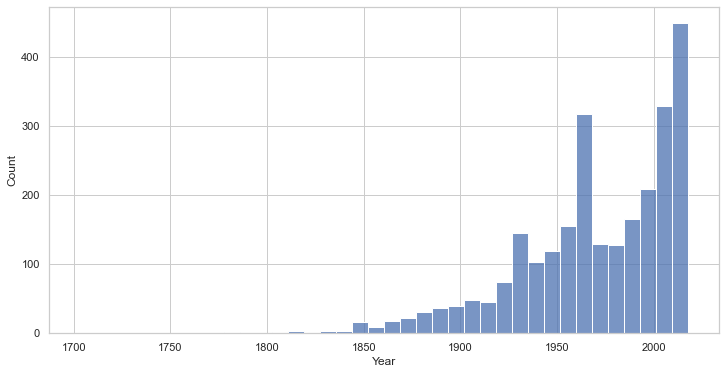

In [20]:
sns.histplot(x=continent_season.Year);

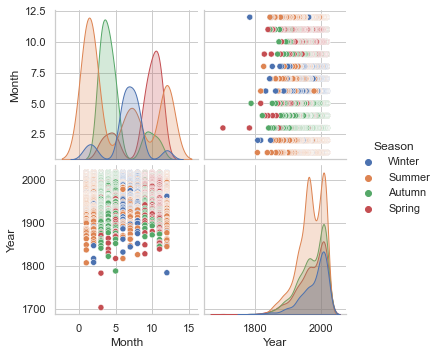

In [21]:
sns.pairplot(continent_season, hue="Season");

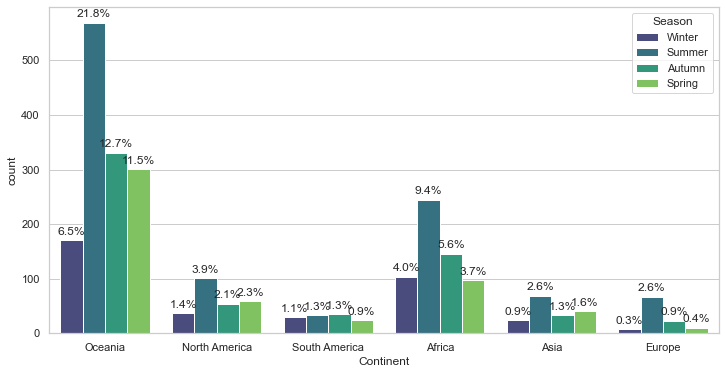

In [22]:
hip_3 = sns.countplot(x=continent_season["Continent"], hue=continent_season["Season"], palette="viridis");

#PERCENTAGE
total = float(len(continent_season))
for bar in hip_3.patches:
    # Obtain the height of the bar
    height = bar.get_height()
    # Calculate the percentage corresponding to the bar height
    percent = '{:.1%}'.format(height/total)
    # Calculate the position of the center of the bar
    x = bar.get_x() + bar.get_width() / 2
    y = height + 10
    
    hip_3.annotate(percent, (x, y), ha='center')

plt.show()
